In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'NYdataset.csv'
df = pd.read_csv(file_path, delimiter=",")

print("\nFirst 5 rows:")
print(df.head())

print("\Column names:")
print(df.columns)

print("\nData types:")
print(df.dtypes)

print("\nNumber of rows and columns:")
print(df.shape)

<>:11: SyntaxWarning: invalid escape sequence '\C'
<>:11: SyntaxWarning: invalid escape sequence '\C'
/var/folders/8y/7mwm55b95m35w_bhv83dypdw0000gn/T/ipykernel_3475/871908367.py:11: SyntaxWarning: invalid escape sequence '\C'
  print("\Column names:")



First 5 rows:
   pickup_year  pickup_month  pickup_day  pickup_dayofweek  pickup_time  \
0         2016           1.0         1.0               5.0          NaN   
1         2016           1.0         1.0               5.0          0.0   
2         2016           1.0         1.0               5.0          0.0   
3         2016           1.0         1.0               5.0          0.0   
4         2016           1.0         1.0               5.0          0.0   

   pickup_location_code  dropoff_location_code  trip_distance  trip_length  \
0                   2.0                    4.0          21.00       2037.0   
1                   2.0                    1.0          16.29       1520.0   
2                   2.0                    6.0          12.70       1462.0   
3                   2.0                    6.0           8.70       1210.0   
4                   2.0                    6.0           5.56        759.0   

   fare_amount  fees_amount  tolls_amount  tip_amount  total_amou

In [18]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
pickup_year                 0
pickup_month                0
pickup_day                  0
pickup_dayofweek            0
pickup_time              4507
pickup_location_code        0
dropoff_location_code       0
trip_distance            4528
trip_length                 0
fare_amount              4548
fees_amount                 0
tolls_amount                0
tip_amount                  0
total_amount                0
payment_type                0
Matricula                   0
Fecha_Licencia              0
dtype: int64


In [19]:
# Identificar columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Rellenar valores faltantes en columnas numéricas con la media
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Rellenar valores faltantes en columnas categóricas con la moda
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
pickup_year              0
pickup_month             0
pickup_day               0
pickup_dayofweek         0
pickup_time              0
pickup_location_code     0
dropoff_location_code    0
trip_distance            0
trip_length              0
fare_amount              0
fees_amount              0
tolls_amount             0
tip_amount               0
total_amount             0
payment_type             0
Matricula                0
Fecha_Licencia           0
dtype: int64


In [20]:
# Diccionario de traducción de meses
meses_traduccion = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
    'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
    'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Función para traducir la fecha
def traducir_fecha(fecha):
    if pd.isna(fecha):
        return fecha
    try:
        mes, anio = fecha.split('-')
        mes_ingles = meses_traduccion.get(mes.lower(), mes)
        return f"{mes_ingles}-{anio}"
    except AttributeError:
        return fecha

# Aplicar la traducción a la columna Fecha_Licencia
df['Fecha_Licencia'] = df['Fecha_Licencia'].apply(traducir_fecha)


In [21]:
print("\nFirst 5 rows:")
print(df.head())

df["Fecha_Licencia"] = pd.to_datetime(df["Fecha_Licencia"], format = "%B-%Y", errors='coerce') # Convertir la columna Fecha_Licencia a fecha

print("\nFirst 5 rows:")
print(df.head(1))


First 5 rows:
   pickup_year  pickup_month  pickup_day  pickup_dayofweek  pickup_time  \
0         2016           1.0         1.0               5.0     3.376069   
1         2016           1.0         1.0               5.0     0.000000   
2         2016           1.0         1.0               5.0     0.000000   
3         2016           1.0         1.0               5.0     0.000000   
4         2016           1.0         1.0               5.0     0.000000   

   pickup_location_code  dropoff_location_code  trip_distance  trip_length  \
0                   2.0                    4.0          21.00       2037.0   
1                   2.0                    1.0          16.29       1520.0   
2                   2.0                    6.0          12.70       1462.0   
3                   2.0                    6.0           8.70       1210.0   
4                   2.0                    6.0           5.56        759.0   

   fare_amount  fees_amount  tolls_amount  tip_amount  total_amou

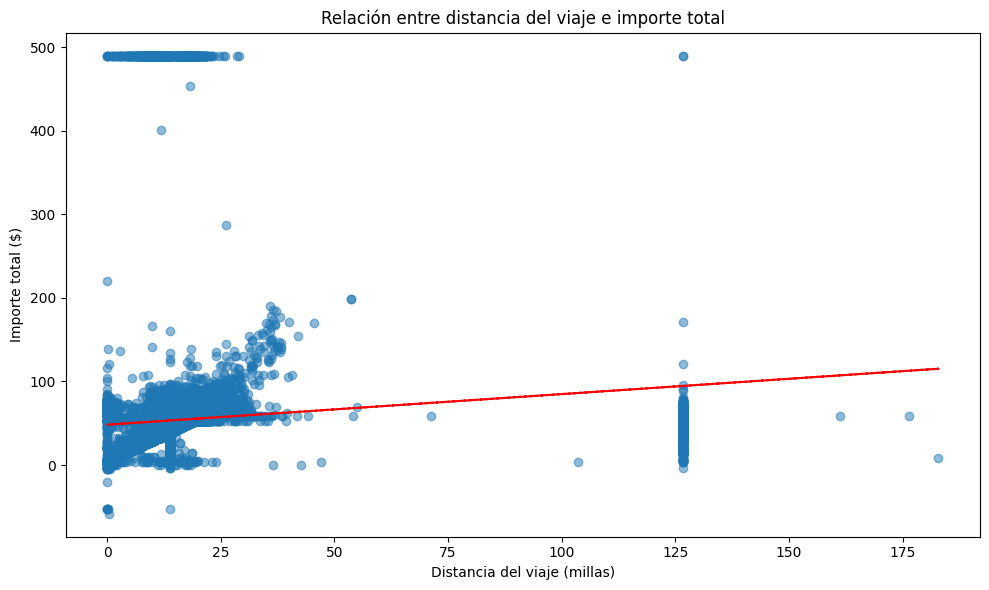

In [22]:
# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['total_amount'], alpha=0.5)
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Importe total ($)')
plt.title('Relación entre distancia del viaje e importe total')

# Añadir una línea de tendencia
z = np.polyfit(df['trip_distance'], df['total_amount'], 1)
p = np.poly1d(z)
plt.plot(df['trip_distance'], p(df['trip_distance']), "r--")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

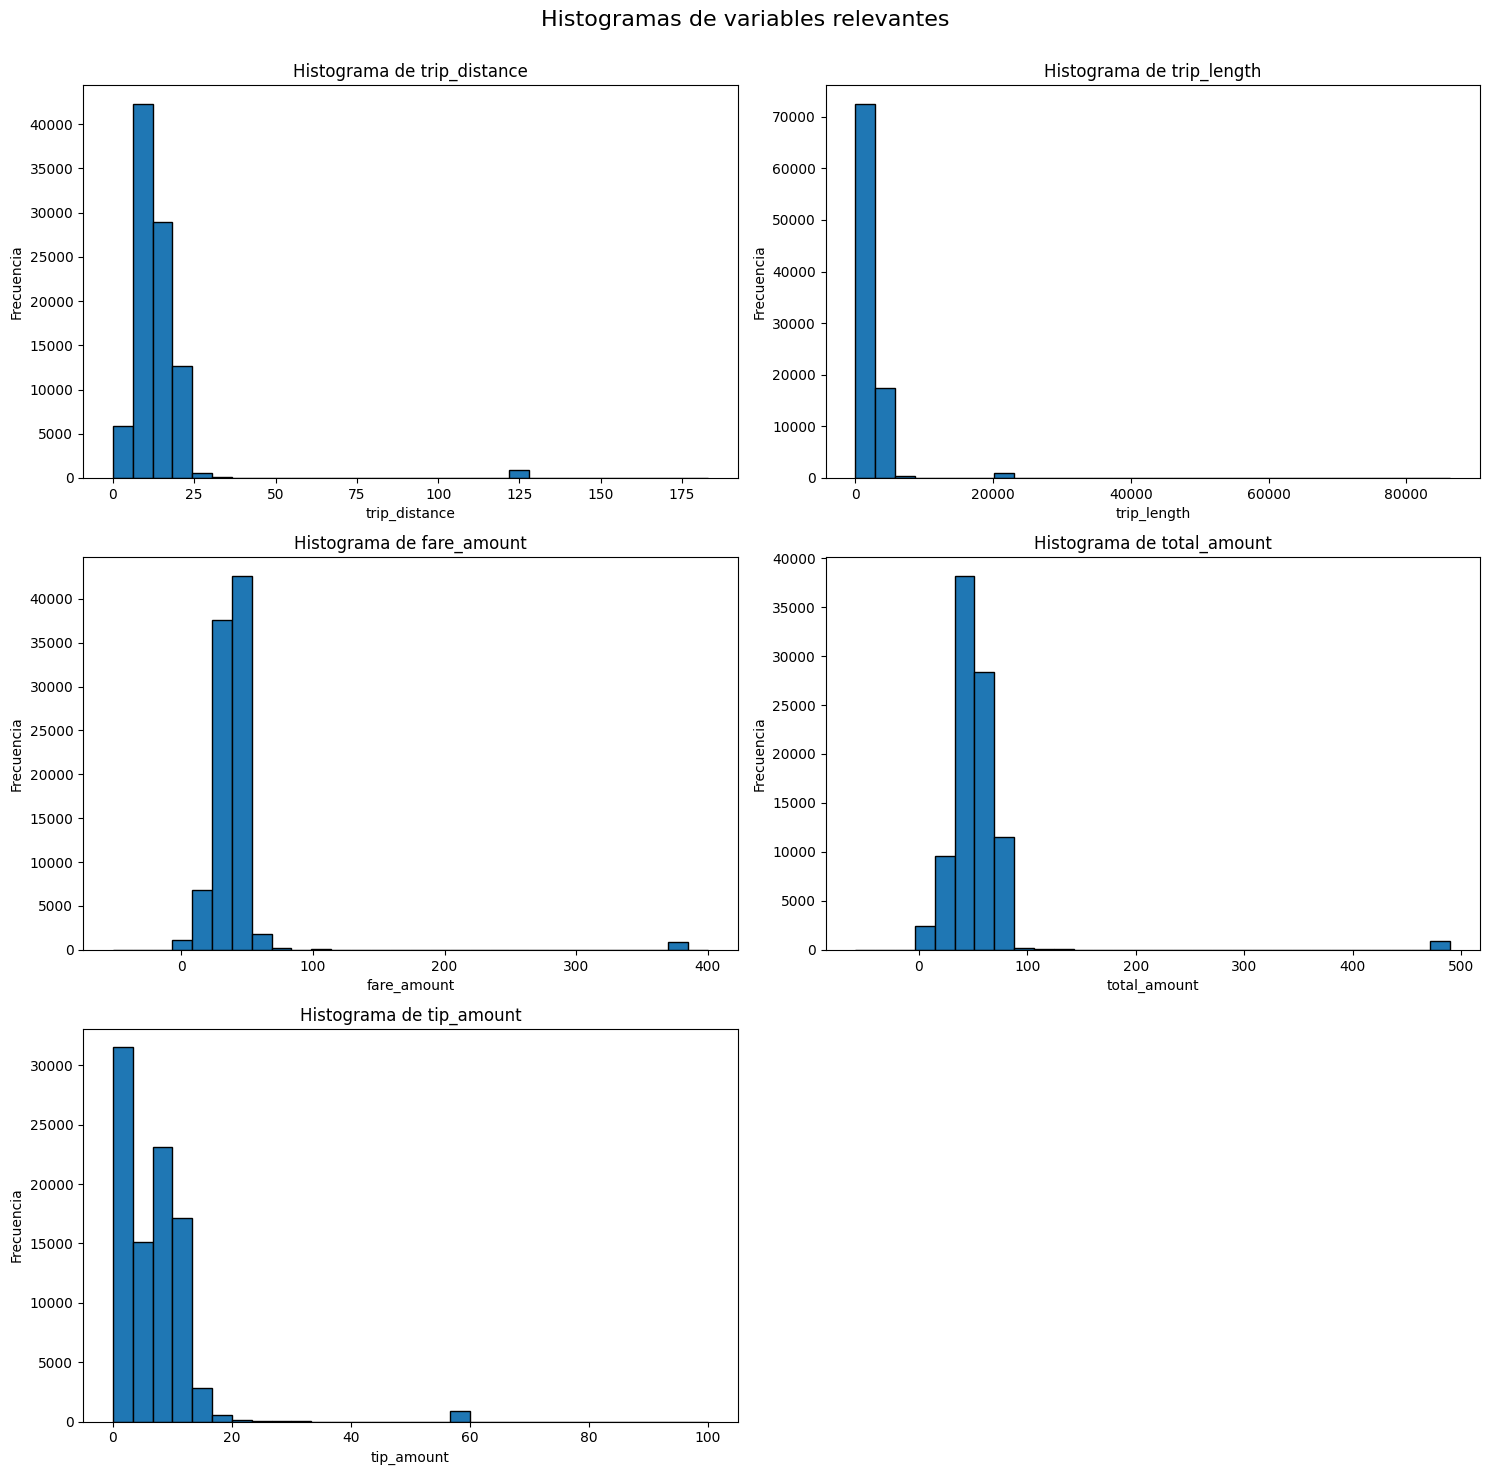

In [23]:
# Definir las columnas relevantes
columnas_relevantes = ['trip_distance', 'trip_length', 'fare_amount', 'total_amount', 'tip_amount']

# Crear subplots para cada columna
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Histogramas de variables relevantes', fontsize=16)

# Aplanar la matriz de subplots para facilitar la iteración
axs = axs.flatten()

# Crear histogramas
for i, columna in enumerate(columnas_relevantes):
    axs[i].hist(df[columna].dropna(), bins=30, edgecolor='black')
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

# Eliminar el subplot extra
if len(columnas_relevantes) < len(axs):
    fig.delaxes(axs[-1])

# Ajustar el diseño
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Mostrar el gráfico
plt.show()




In [31]:
df["Plate_letters"] = df["Matricula"].str.extract(r'([A-Z]+)') # Extraer las letras de la columna Matricula
df["Plate_numbers"] = df["Matricula"].str.extract(r'(\d+)') # Extraer los números de la columna Matricula

print("\nFirst 5 rows:")
print(df[["Matricula","Plate_letters","Plate_numbers"]].head())


First 5 rows:
  Matricula Plate_letters Plate_numbers
0  WPW-1898           WPW          1898
1  VES-6457           VES          6457
2  KFR-0853           KFR          0853
3  ABF-2172           ABF          2172
4  CTA-3279           CTA          3279


In [28]:
print(df.dtypes)

pickup_year                       int64
pickup_month                    float64
pickup_day                      float64
pickup_dayofweek                float64
pickup_time                     float64
pickup_location_code            float64
dropoff_location_code           float64
trip_distance                   float64
trip_length                     float64
fare_amount                     float64
fees_amount                     float64
tolls_amount                    float64
tip_amount                      float64
total_amount                    float64
payment_type                    float64
Matricula                        object
Fecha_Licencia           datetime64[ns]
Plate_letters                    object
Plate_numbers                    object
dtype: object
